# Prediction of Hospital Readmission of Diabetic Patients through a Random Forest Classifier

This project aims to predict the readmission of diabetic patients at U.S Hospitals. The data was extracted from the machine learning repository of University of California Irvine. The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes.



Readmission is a measurement that is correlated with quality in hospitals. The more readmission rate, the less score in quality (at least in U.S). Moreover, low quality equals serious penalizations to hospitals. Therefore, if we could identify the patients with high probability of being readmitted, we could create interventions to provide additional assistance in order to avoid future readmission. In this way, we improve quality and save cost for penalties.  

# 1. Getting started

I will use Google Colaboratory for the whole analysis process. Since Google Colab does not support natively some libraries, I need to install the scikit-plot library through the "pip" command:







In [1]:
#Instaling scikit-plot
pip install scikit-plot

The other Python libraries are:

In [0]:
#Libraries

#Data Wrangling
import pandas as pd
import numpy as np

#SkLearn core and algorithms
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

#Graphs
import scikitplot as skplt
import matplotlib.pyplot as plt

#Dimensionality Reduction
from sklearn.decomposition import PCA

The dataset is stored in an CSV file uploaded in GitHub. Therefore, I am going to use Pandas for reading and storing the file in a Pandas DataFrame:

In [0]:
#Importing the dataset
url = "https://raw.githubusercontent.com/Dedox-tech/Data-Science-Projects/master/diabetic_data.csv"

#Reading the dataset
dataset = pd.read_csv(url)

# 2. Data Exploration

In this line we are understanding our data and the principal features:

In [4]:
#Displaying the dataset
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


This is a considerable kind of big dataset actually. It has around 100.000 rows and 50 columns.

In [5]:
#Displaying the info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

# 3. Preprocessing

Before of starting the analysis, we need to do a small preprocessing step. We need remplace the value of cells differents of "NO". I mean, the cells of values "greater than 30 days" and "less than 30 days" for a unique value. 

We do this because actually we are interested in just predict whether a patient will be readmitted. We are not interested in predict the specific amount of days for now.

The target values are:

In [0]:
#Selecting target values
y = dataset["readmitted"]

Showing the target values:


In [7]:
#Printing the target values
y.head(n=15)

0      NO
1     >30
2      NO
3      NO
4      NO
5     >30
6      NO
7     >30
8      NO
9      NO
10    >30
11    <30
12    <30
13     NO
14    >30
Name: readmitted, dtype: object

In addition to the explained in the last paragaph, we have to do a label encoding:

In [0]:
#Performing label encoding 
y.replace("NO",0,inplace=True)

Showing the manual label encoding:

In [9]:
#Showing the results of label encoding
y.head(n=15)

0       0
1     >30
2       0
3       0
4       0
5     >30
6       0
7     >30
8       0
9       0
10    >30
11    <30
12    <30
13      0
14    >30
Name: readmitted, dtype: object

Now we are performing the task that we were talking before:

In [0]:
#Performing label encoding
y.replace(["<30",">30"],1,inplace=True)

Showing the results:

In [11]:
#Showing the results of label encoding
y.head(n=15)

0     0
1     1
2     0
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    1
11    1
12    1
13    0
14    1
Name: readmitted, dtype: int64

# 4. Data Analysis

It is time for the real analysis.

Here we can see the proportion of no readmitted vs readmitted:

In [12]:
#Counting the values in the target feature
y.value_counts()

0    54864
1    46902
Name: readmitted, dtype: int64

There are more no readmitted patients than readmitted ones.

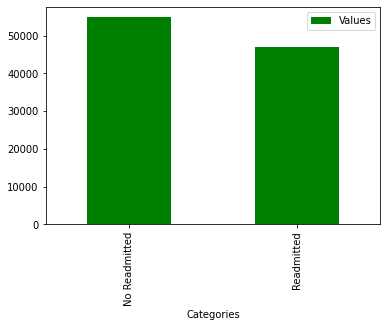

In [13]:
#Plotting the target
Data_Readmission = {"Categories": ["No Readmitted", "Readmitted"], "Values": [54864, 46902]}
Readmission = pd.DataFrame(data = Data_Readmission)
Readmission.plot(x = "Categories", y = "Values", kind="bar", color="green")
plt.show()

The predictors of the dataset are:

In [0]:
#Storing the features in a local variable
X = dataset[["encounter_id", "patient_nbr", "race", "gender", "age", "weight", "admission_type_id", "discharge_disposition_id", "admission_source_id", "time_in_hospital",            
"payer_code", "medical_specialty", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient",            
"diag_1", "diag_2", "diag_3", "number_diagnoses", "max_glu_serum", "A1Cresult", "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride",                 
"acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide",                     
"citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone",      
"change", "diabetesMed"]] 

In [15]:
#Showing the features
X.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes


The patients have diferentes race. The majority of them are Caucasian and AfricanAmerican. There are less proportion of Hispanic and Asian patients.

In [16]:
#Counting the race
X["race"].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Let's plotting the race feature:

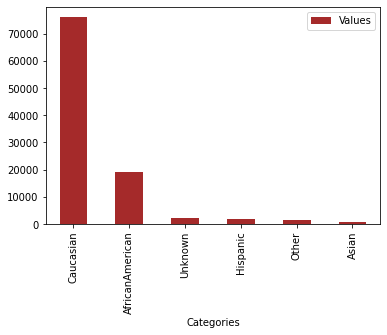

In [17]:
#Plotting the race
Data_Race = {"Categories": ["Caucasian", "AfricanAmerican", "Unknown", "Hispanic", "Other", "Asian"] , "Values": [76099, 19210, 2273, 2037, 1506, 641] }
Race = pd.DataFrame(data = Data_Race)
Race.plot(x= "Categories", y="Values", kind="bar", color = "brown")
plt.show()

Moreover, mostly diabetic patients at U.S Hospitals are female:

In [18]:
#Counting the gender
X["gender"].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

For more clarity, we are plotting the gender feature with the following code:

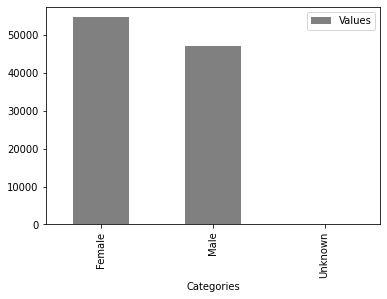

In [19]:
#Plotting the gender
Data_Gender = {"Categories": ["Female", "Male", "Unknown"] ,"Values": [54708, 47055, 3]}
Gender = pd.DataFrame(data = Data_Gender)
Gender.plot(x = "Categories", y = "Values", kind = "bar", color = "gray")
plt.show()

The last feature that we will explore is the age. Diabetic patients seem belong a variety of ages. Nevertheless, the more representative group of this patients are people in a age range of 70-80. I mean, the older ones.

In [20]:
#Counting the age
X["age"].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

Finally, plotting the age:

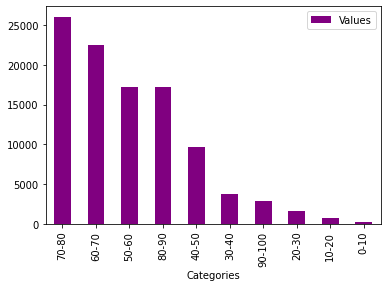

In [21]:
#Plotting the age
Data_Age = {"Categories": ["70-80","60-70","50-60","80-90","40-50","30-40","90-100","20-30","10-20","0-10"], "Values": [26068,22483,17256,17197,9685,3775,2793,1657,691,161]}
Age = pd.DataFrame(data = Data_Age)
Age.plot(x = "Categories", y ="Values", kind="bar", color = "purple")
plt.show()

# 5. Modeling

We will perfom feature transformation for dealing with the nature of the data. One-Hot-Encoding for predictors (X) is, the majority of times, a wise approach:

In [0]:
#Performing One-Hot-Encoding
X = pd.get_dummies(X[["encounter_id", "patient_nbr", "race", "gender", "age", "weight", "admission_type_id", "discharge_disposition_id", "admission_source_id", "time_in_hospital",            
"payer_code", "medical_specialty", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient",            
"diag_1", "diag_2", "diag_3", "number_diagnoses", "max_glu_serum", "A1Cresult", "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride",                 
"acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide",                     
"citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone",      
"change", "diabetesMed"]])

In [23]:
#Showing the results of One-Hot-Encoding
X.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),weight_>200,weight_?,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),...,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1


Now, we have to split the whole dataset in training and test set:

In [0]:
#Splitting the dasatet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y , random_state = 0)

I will try a kind of dimensionality reduction technique first. PCA (Principal Component Analysis) is always the first option:

In [0]:
#Declaring the PCA object
pca_train = PCA(random_state=0, n_components=2)
pca_test = PCA(random_state=0, n_components=2)

Here we fit our PCA objetct with the dataset. It is important to perform the transformation sepparately for prevent data leakage:

In [26]:
#Fitting PCA with the dataset
pca_train.fit(X_train)
pca_test.fit(X_test)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

Here we are analyzing whether the number of components is the right or it is not:

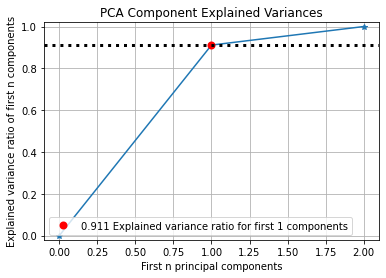

In [27]:
#Checking the adequate number of components
skplt.decomposition.plot_pca_component_variance(pca_train)

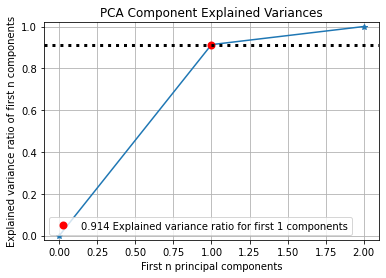

In [28]:
#Checking the adequate number of components
skplt.decomposition.plot_pca_component_variance(pca_test)

We can see that two components are adequate. Also just one components is ideal because is able to explain a big proportion of the variance.


However, our objective here is achieve the better classification. So we will not use the PCA in the model. In a real-production scenario, with much many data, we would have to use PCA for save computational costs, and it would works well. But that is not our case now.  

Let's continue. I will import a Random Forest Classifier from Sklearn:

In [0]:
#Declaring the model
Forest = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight="balanced")

Subsequently, we need fitting the tree with our data:

In [30]:
#Fitting the model
Forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The previous are the parameters of the Random Forest Classifier.

# 6. Results
# 6.1 Prediction and Accuracy

Finally, these are the predictions and the score given for the model:

In [31]:
#Prediction of the class label
Test_Set_Prediction =  Forest.predict(X_test)
print("Class label prediction: ")
print(Test_Set_Prediction)
print("\n")

#Prediction of the probabilities
Test_Set_Prediction_Proba = Forest.predict_proba(X_test)
print("Proba prediction: ")
print(Test_Set_Prediction_Proba)
print("\n")

#Accuracy
Test_Set_Score = Forest.score(X_test, y_test)
print("Accuracy: ")
print(Test_Set_Score)

Class label prediction: 
[0 0 0 ... 0 1 0]


Proba prediction: 
[[0.5034713  0.4965287 ]
 [0.57055935 0.42944065]
 [0.54585459 0.45414541]
 ...
 [0.54317951 0.45682049]
 [0.45219967 0.54780033]
 [0.56160089 0.43839911]]


Accuracy: 
0.6308859366402012


## 6.2 Other Metrics


Since this is a binary classification problem, it could be usufel to see the Precision and Recall Metrics. So let’s explore the Confusion Matrix first, and the proper Precison-Recall curve after.

Let’s plotting the Confusion Matrix with the help of Scikitplot:

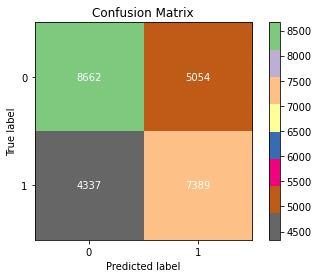

In [32]:
#Matrix
skplt.metrics.plot_confusion_matrix(y_test, Test_Set_Prediction, normalize=False, cmap="Accent_r")
plt.show()

We could see that the model classifies correctly 7341 patients that are readmitted (4385 mislabeled). On the other hand, our Random Forest label clasiffies correctly 8732 not readmitted patients (4993 mislabeled). I am not aspiring for a perfect score so think it is OK for the sake of actual learning.

Now, for a more structured metric, let’s see the Precision-Recall Curve:

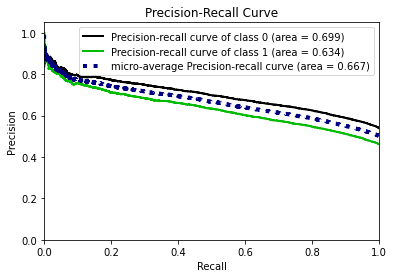

In [33]:
#Precision-Recall curve
skplt.metrics.plot_precision_recall(y_test, Test_Set_Prediction_Proba)
plt.show()

The microaverage score for the Precision-Recall curve is 0.66. Again, compared with a probablistic-based random baseline, the model outperform it around 1.5 times. Not really bad actually. 

Finally, it is useful for decision makers to know which predictors (X) are the highest correlated with patient readmission. Therefore, plotting the list of feature importance:

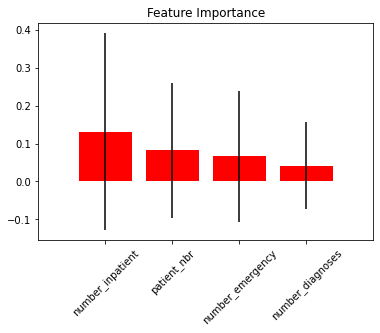

In [34]:
#Feature Importance
skplt.estimators.plot_feature_importances(Forest, title="Feature Importance", x_tick_rotation=45, max_num_features=4, feature_names = X_train.columns)
plt.show()

Just a quick reminder. These are not the original features. The features showen are the transformed using One-Hot-Encoding.